In [11]:
import numpy as np
from sklearn import *

In [12]:
m  = 60000;
low = 1
high = 40

In [13]:
d_vals = np.arange(low, high, 1)
exp_var = []
print(d_vals)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [14]:
def gen_x(d, m):
    X = np.random.normal(0, 1, (d,2*m))
    return X

In [15]:
def gen_y(X,d,m,w_b):
    y = np.zeros((2*m ,))
    for i in range(2*m):
        samp = np.random.normal(w_b @ X[:, i], 1)
        y[i] = samp
    return y

In [16]:
def find_exp_var(d,m):
    X = gen_x(d, m)
    w_b = np.random.randn(d,) #the bayes optimal w
    y = gen_y(X, d, m, w_b)
    reg = linear_model.LinearRegression().fit(X.T, y)
    score = reg.score(X.T,y)
    coefficients = reg.coef_
    y_predict = reg.predict(X.T)
    exvar = metrics.explained_variance_score(y,y_predict)
    return exvar


In [17]:
find_exp_var(5, m)
find_exp_var(6, m)

0.8637993818380705

In [18]:
d_vals.shape[0]

39

In [20]:
for i in range(d_vals.shape[0]):
    exp_var.append(find_exp_var(d_vals[i], m))
    print("Iteration : "  + str(i) + " exp_var : ", find_exp_var(d_vals[i], m))

Iteration : 0 exp_var :  0.09786065131631472
Iteration : 1 exp_var :  0.6329859767359048
Iteration : 2 exp_var :  0.8666088747109297
Iteration : 3 exp_var :  0.6810512670985909
Iteration : 4 exp_var :  0.6292002551982264
Iteration : 5 exp_var :  0.7828846839767362
Iteration : 6 exp_var :  0.8360838547312226
Iteration : 7 exp_var :  0.8366122728353369
Iteration : 8 exp_var :  0.9450055837641007
Iteration : 9 exp_var :  0.9248642536128724
Iteration : 10 exp_var :  0.9339843757737457
Iteration : 11 exp_var :  0.9260956435754673
Iteration : 12 exp_var :  0.8983266789393494
Iteration : 13 exp_var :  0.9278917678119809
Iteration : 14 exp_var :  0.8942632364897809
Iteration : 15 exp_var :  0.9366638326858027
Iteration : 16 exp_var :  0.9583778321527374
Iteration : 17 exp_var :  0.9129190777008627
Iteration : 18 exp_var :  0.9604026706373447
Iteration : 19 exp_var :  0.9667921199712778
Iteration : 20 exp_var :  0.9455916963442279
Iteration : 21 exp_var :  0.9583192219126021
Iteration : 22 exp_

In [21]:
print(exp_var)

[0.7112649293341416, 0.5615920944271615, 0.6821648826553514, 0.7937664279387283, 0.8288722512183851, 0.5605367808698094, 0.8752062629404999, 0.8547975622557633, 0.9124754956686177, 0.9005173756541942, 0.8949563885223278, 0.9153820475807385, 0.8725050049156453, 0.7791354634536952, 0.8933844173924803, 0.9387393053331169, 0.9431466154510193, 0.9516381285223847, 0.9231500292042681, 0.8761896101378523, 0.9559660477540864, 0.9565984003693537, 0.9639962672549958, 0.9511936984576852, 0.9652245588151437, 0.9545423167409232, 0.9491767418972328, 0.9668834731864944, 0.9745905484318168, 0.971600072803453, 0.9659919389025006, 0.9753331661581252, 0.9738834881536284, 0.9501235030459824, 0.9806587059839398, 0.9805653257981071, 0.9717353952366327, 0.974366361504208, 0.9735756231955668]


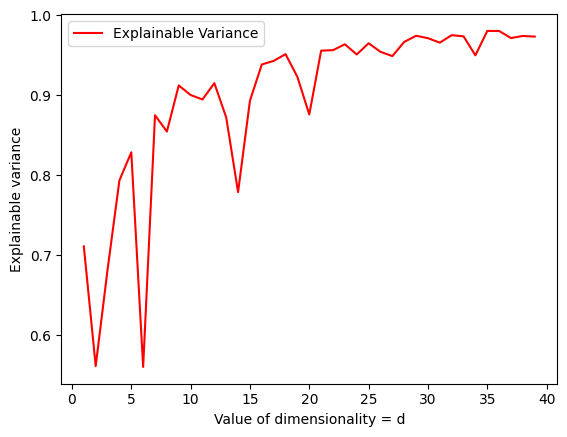

In [27]:
import matplotlib.pyplot as plt
plt.plot(d_vals, exp_var, color= 'r', label = 'Explainable Variance')
plt.xlabel("Value of dimensionality = d")
plt.ylabel("Explainable variance")
plt.legend()